In [264]:
import json
import matplotlib.pyplot as plt
import math
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [265]:
# Load data from JSON file
with open('data.json', 'r') as file:
    data = json.load(file)

    # Extracting data for plottin
    years = list(data.keys())
    months = list(data[years[0]].keys())
    print(months)
    cpi_data = [29.0,28.9,28.9,29.0,29.0,29.1,29.2,29.2,29.3,29.4,29.4,29.4]
    unem_data = []
    fed_data = []
    adj_unem_data = []
    for year in years:
        for month in months:
            #Check if data[year] has month as a key
            if not month in data[year]:
                break
            cpi_data.append(float(data[year][month]['CPI']))
            unem_data.append(float(data[year][month]['Unemployment']))
            adj_unem_data.append(float(data[year][month]['Unemployment'])-4)
            fed_data.append(float(data[year][month]['FedFunds']))
    years = [int(year) for year in years]


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
def getIndexFromYearMonth(year, month):
    #year = int(year)
    month = months.index(month)
    return (year-1960)*12 + month

print(cpi_data[getIndexFromYearMonth(2024, 'Jan')+12])


['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
308.417


[5.2, 4.8, 5.4, 5.2, 5.1, 5.4, 5.5, 5.6, 5.5, 6.1, 6.1, 6.6, 6.6, 6.9, 6.9, 7.0, 7.1, 6.9, 7.0, 6.6, 6.7, 6.5, 6.1, 6.0, 5.8, 5.5, 5.6, 5.6, 5.5, 5.5, 5.4, 5.7, 5.6, 5.4, 5.7, 5.5, 5.7, 5.9, 5.7, 5.7, 5.9, 5.6, 5.6, 5.4, 5.5, 5.5, 5.7, 5.5, 5.6, 5.4, 5.4, 5.3, 5.1, 5.2, 4.9, 5.0, 5.1, 5.1, 4.8, 5.0, 4.9, 5.1, 4.7, 4.8, 4.6, 4.6, 4.4, 4.4, 4.3, 4.2, 4.1, 4.0, 4.0, 3.8, 3.8, 3.8, 3.9, 3.8, 3.8, 3.8, 3.7, 3.7, 3.6, 3.8, 3.9, 3.8, 3.8, 3.8, 3.8, 3.9, 3.8, 3.8, 3.8, 4.0, 3.9, 3.8, 3.7, 3.8, 3.7, 3.5, 3.5, 3.7, 3.7, 3.5, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.7, 3.7, 3.5, 3.5, 3.9, 4.2, 4.4, 4.6, 4.8, 4.9, 5.0, 5.1, 5.4, 5.5, 5.9, 6.1, 5.9, 5.9, 6.0, 5.9, 5.9, 5.9, 6.0, 6.1, 6.0, 5.8, 6.0, 6.0, 5.8, 5.7, 5.8, 5.7, 5.7, 5.7, 5.6, 5.6, 5.5, 5.6, 5.3, 5.2, 4.9, 5.0, 4.9, 5.0, 4.9, 4.9, 4.8, 4.8, 4.8, 4.6, 4.8, 4.9, 5.1, 5.2, 5.1, 5.1, 5.1, 5.4, 5.5, 5.5, 5.9, 6.0, 6.6, 7.2, 8.1, 8.1, 8.6, 8.8, 9.0, 8.8, 8.6, 8.4, 8.4, 8.4, 8.3, 8.2, 7.9, 7.7, 7.6, 7.7, 7.4, 7.6, 7.8, 7.8,

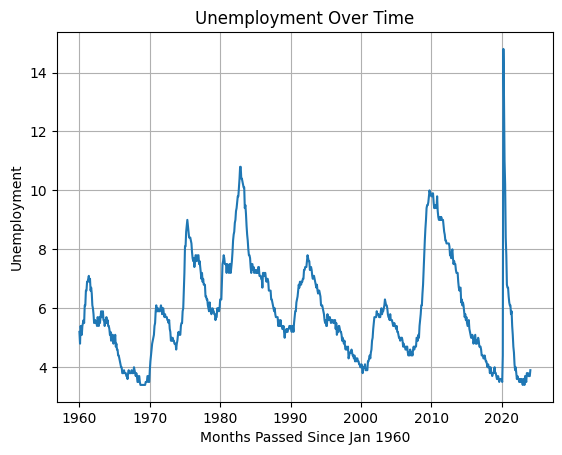

In [266]:
print(unem_data)
year_start = 1960
month_start = 'Jan'
#months_passed = range(getIndexFromYearMonth(year_start, month_start), len(cpi_data))
months_passed = range(0, len(fed_data))
years_passed = [1960+(i/12) for i in months_passed]
print(months_passed)

# Plotting CPI data
plt.plot(years_passed, unem_data, linewidth=1.5)  # marker='o' adds circular markers at data points
plt.title('Unemployment Over Time')
plt.xlabel(f'Months Passed Since {month_start} {year_start}')
plt.ylabel('Unemployment')
plt.grid(True)
plt.show()

770
770


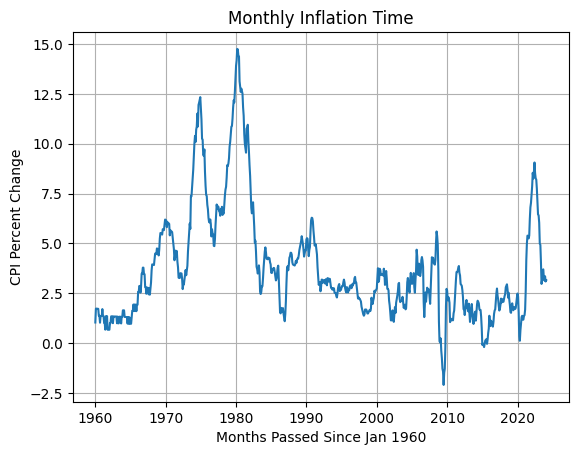

In [267]:

def inflation_12_month(month):
    #return 100*math.log(cpi_data[month]/cpi_data[month-12])
    return 100*(cpi_data[month]-cpi_data[month-12])/cpi_data[month-12]
ADJ_CPI_monthly = []
CPI_monthly = []
CPI_monthly.extend([inflation_12_month(month) for month in range(12, len(months_passed)+12)])
ADJ_CPI_monthly.extend([inflation_12_month(month)-2 for month in range(12, len(months_passed)+12)])
print(len(CPI_monthly))
print(len(ADJ_CPI_monthly))
plt.plot(years_passed, CPI_monthly, linewidth=1.5) 

plt.title('Monthly Inflation Time')
plt.xlabel(f'Months Passed Since {month_start} {year_start}')
plt.ylabel('CPI Percent Change')
plt.grid(True)
plt.show()


770 770 770 770
12 769
5.33 5.486327171842074


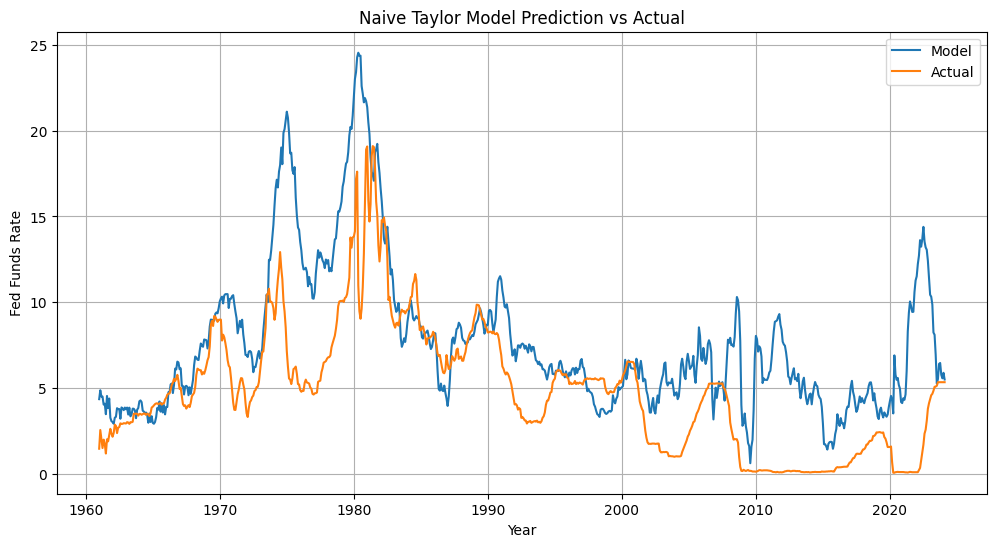

Mean Squared Error (MSE): 18.651272679899414


In [274]:
#Applying Taylor Model

# rt = 1 + 1.5p_t-1 + .5(u_t–1 – 4)
#1959 Dec Unem: 5.3

#GREENSPAN
# START_YEAR = 1987 #Do not set below Feb 1961
# START_MONTH = 'Aug'

# END_YEAR = 2005 #Do not set above Feb 2024
# END_MONTH = 'Nov'

START_YEAR = 1961
START_MONTH = 'Jan'

END_YEAR = 2024
END_MONTH = 'Feb'

START_INDEX = getIndexFromYearMonth(START_YEAR, START_MONTH)
END_INDEX = getIndexFromYearMonth(END_YEAR, END_MONTH)

taylor_model = [0]
for i in range(1, len(months_passed)):
    taylor_model.append(1 + 1.5*CPI_monthly[i-1] + 0.5*(unem_data[i-1] - 4))
print(len(years_passed), len(months_passed), len(taylor_model), len(fed_data))
print(START_INDEX, END_INDEX)
print(fed_data[770-1], taylor_model[770-1])

plt.figure(figsize=(12, 6))
plt.plot(years_passed[START_INDEX:END_INDEX+1], taylor_model[START_INDEX:END_INDEX+1], linewidth=1.5, label='Model')
plt.plot(years_passed[START_INDEX:END_INDEX+1], fed_data[START_INDEX:END_INDEX+1], linewidth=1.5, label='Actual') 
plt.title('Naive Taylor Model Prediction vs Actual')
plt.xlabel(f'Year')
plt.ylabel('Fed Funds Rate')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(fed_data[START_INDEX:END_INDEX+1], taylor_model[START_INDEX:END_INDEX+1])
print("Mean Squared Error (MSE):", mse)


290 203 87
[ 0.13364348 -0.51179848] 2.3567521862809464
Mean Squared Error (MSE): 2.8298385171263174


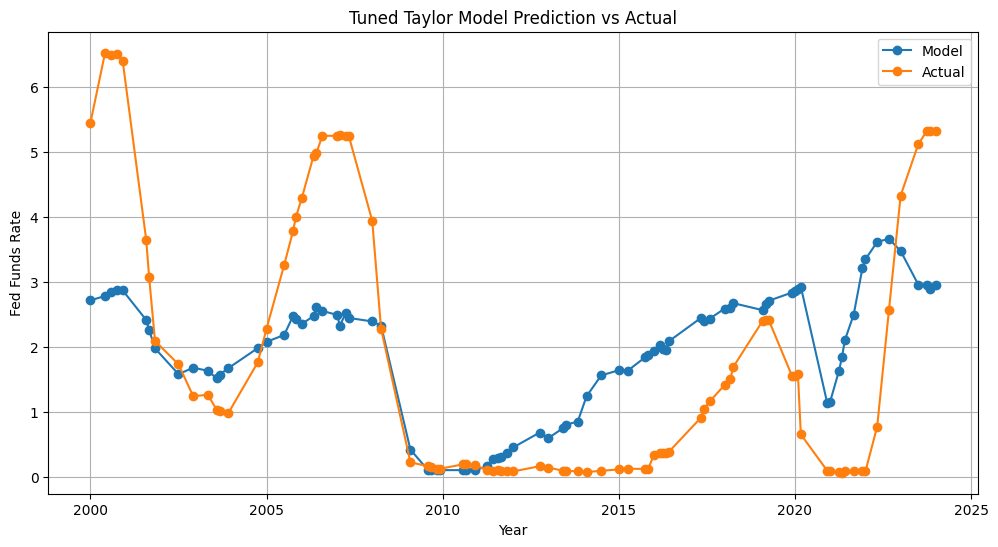

In [269]:
CPI_Sample = np.array(CPI_monthly[START_INDEX-1:END_INDEX])
Unem_Sample = np.array(adj_unem_data[START_INDEX-1:END_INDEX])
Fed_Sample = np.array(fed_data[START_INDEX:END_INDEX+1])
Years_Sample = np.array(years_passed[START_INDEX:END_INDEX+1])

#print(Fed_Sample)
total_samples = END_INDEX - START_INDEX + 1
indices = np.random.permutation(total_samples)

train_samples = int(total_samples * 0.7)
val_samples = total_samples - train_samples


x1_train, x2_train, Y_train = CPI_Sample[indices[:train_samples]], Unem_Sample[indices[:train_samples]], Fed_Sample[indices[:train_samples]]
year_train = Years_Sample[indices[:train_samples]]

x1_val, x2_val, Y_Val = CPI_Sample[indices[train_samples:train_samples+val_samples]], \
                        Unem_Sample[indices[train_samples:train_samples+val_samples]], \
                        Fed_Sample[indices[train_samples:train_samples+val_samples]]
year_val = Years_Sample[indices[train_samples:train_samples+val_samples]]

# print(x2_train)
# print(x2_val)
print(total_samples, len(x1_train), len(x1_val))

X_train = np.column_stack((np.ones_like(x1_train), x1_train, x2_train))
X_Val = np.column_stack((np.ones_like(x1_val), x1_val, x2_val))
#print(X_train)
model = LinearRegression()
model.fit(X_train, Y_train)

print(model.coef_[1:], model.intercept_)
Y_Pred = np.maximum(model.predict(X_Val), 0.1)
mse = mean_squared_error(Y_Val, Y_Pred)
print("Mean Squared Error (MSE):", mse)

sorted_indices = np.argsort(year_val)
plt.figure(figsize=(12, 6))
plt.plot(year_val[sorted_indices], Y_Pred[sorted_indices], linewidth=1.5, label='Model', marker='o')
plt.plot(year_val[sorted_indices], Y_Val[sorted_indices], linewidth=1.5, label='Actual', marker='o') 


plt.title('Tuned Taylor Model Prediction vs Actual')
plt.xlabel(f'Year')
plt.ylabel('Fed Funds Rate')
plt.legend()
plt.grid(True)
plt.show()

758 151 607
[1975.5        1992.41666667 1978.33333333 1989.83333333 1971.
 1985.83333333 1961.75       2005.91666667 1965.         2007.16666667
 1978.5        2023.58333333 1983.08333333 1962.75       1972.91666667
 1969.58333333 2012.75       2017.83333333 1993.41666667 2015.66666667
 2011.33333333 2001.08333333 1966.33333333 2014.25       2012.16666667
 2018.5        1999.25       1978.         1978.75       1968.41666667
 1987.83333333 1969.25       1976.33333333 2023.5        2007.41666667
 2014.         1969.66666667 1998.58333333 2021.5        2023.66666667
 2002.08333333 2014.5        2000.25       1963.58333333 1981.08333333
 2018.75       2015.5        2003.58333333 2014.58333333 2014.83333333
 1996.5        2020.58333333 1976.75       1961.16666667 1961.5
 2005.83333333 2016.83333333 2015.91666667 1965.25       2016.33333333
 1982.5        1994.08333333 1995.83333333 2005.16666667 2001.
 1979.16666667 2001.25       2006.83333333 1969.5        2022.5
 2021.75       2013.25  

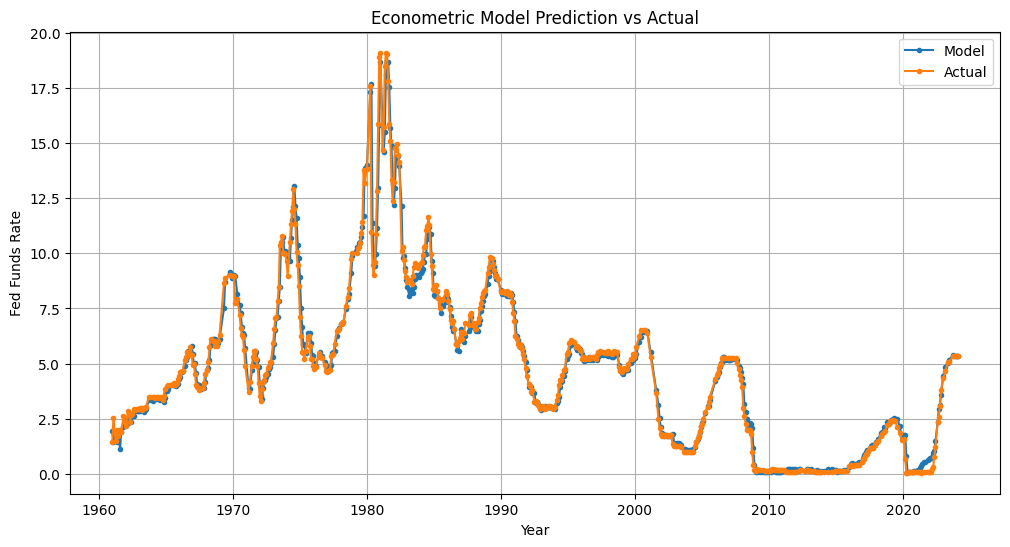

In [276]:
CPI_Sample = np.array(ADJ_CPI_monthly[START_INDEX-1:END_INDEX])
Unem_Sample = np.array(adj_unem_data[START_INDEX-1:END_INDEX])
Fed_Sample = np.array(fed_data[START_INDEX-1:END_INDEX])
Years_Sample = np.array(years_passed[START_INDEX:END_INDEX+1])
Output_Sample = np.array(fed_data[START_INDEX:END_INDEX+1])

total_samples = END_INDEX - START_INDEX + 1
indices = np.random.permutation(total_samples)

train_samples = int(total_samples * 0.5)
val_samples = total_samples - train_samples

x1_train, x2_train, x3_train, Y_train = CPI_Sample[indices[:train_samples]], \
                                Unem_Sample[indices[:train_samples]], \
                                Fed_Sample[indices[:train_samples]], \
                                Output_Sample[indices[:train_samples]]
year_train = Years_Sample[indices[:train_samples]]

x1_val, x2_val, x3_val, Y_Val = CPI_Sample[indices[train_samples:train_samples+val_samples]], \
                        Unem_Sample[indices[train_samples:train_samples+val_samples]], \
                        Fed_Sample[indices[train_samples:train_samples+val_samples]],\
                        Output_Sample[indices[train_samples:train_samples+val_samples]]
year_val = Years_Sample[indices[train_samples:train_samples+val_samples]]

print(total_samples, len(x1_train), len(x1_val))
print(year_train, year_val)


X_train = np.column_stack((np.ones_like(x1_train), x1_train, x2_train, x3_train))
X_Val = np.column_stack((np.ones_like(x1_val), x1_val, x2_val, x3_val))
#print(X_train)
model = LinearRegression()
model.fit(X_train, Y_train)

print(model.coef_[1:], model.intercept_)
Y_Pred = np.maximum(model.predict(X_Val), 0.1)
mse = mean_squared_error(Y_Val, Y_Pred)
print("Mean Squared Error (MSE):", mse)

sorted_indices = np.argsort(year_val)
plt.figure(figsize=(12, 6))
plt.plot(year_val[sorted_indices], Y_Pred[sorted_indices], linewidth=1.5, label='Model', marker='o')
plt.plot(year_val[sorted_indices], Y_Val[sorted_indices], linewidth=1.5, label='Actual', marker='o') 


plt.title('Econometric Model Prediction vs Actual')
plt.xlabel(f'Year')
plt.ylabel('Fed Funds Rate')
plt.legend()
plt.grid(True)
plt.show()